## Meteorite Landings based on Mass and Category

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geo_plots import plot_geodata as pg

Import csv containing meteorite landing data

In [2]:
df = pd.read_csv('meteorite.csv')

In [4]:
df['category'] = df['category'].replace('irons', 'Irons')

C:\Users\M252606\AppData\Local\Temp\ipykernel_9612\1472523758.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


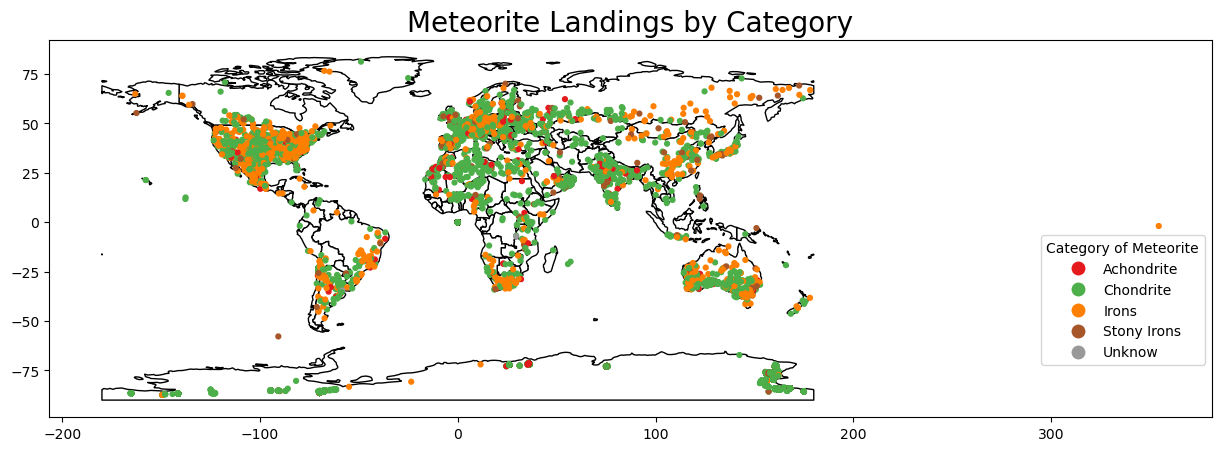

In [180]:
# create the geomtry matrix
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

#put into gdf as its own df
gdf = gpd.GeoDataFrame(df, geometry=geometry)

#import the world plot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10)) 
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, column='category', cmap='Set1', markersize=12, legend=True, label='Category')
plt.title('Meteorite Landings by Category', fontsize=20)  # Add title

# Increase the size of the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))  # Adjust the position of the legend
leg.set_title('Category of Meteorite') 

Text(0, 0.5, 'Count')

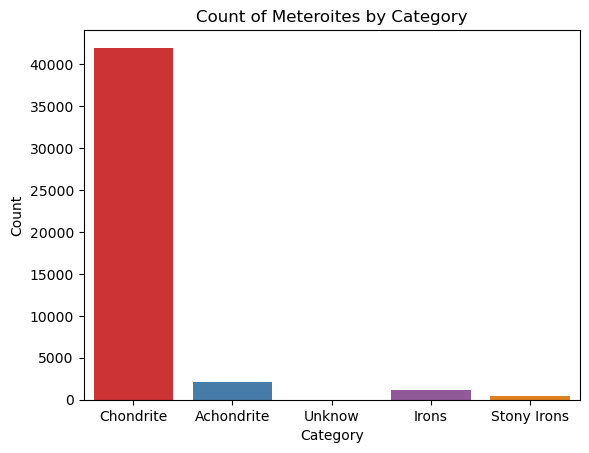

In [179]:
# calls the count graph
sns.countplot(data=df, x='category', palette='Set1')

# Set title and labels
plt.title('Count of Meteroites by Category')
plt.xlabel('Category')
plt.ylabel('Count')

In [231]:
df_filtered = df[(df['lat'].between(-90, 90)) & (df['long'].between(-180, 180))]

C:\Users\M252606\AppData\Local\Temp\ipykernel_9612\2708641972.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


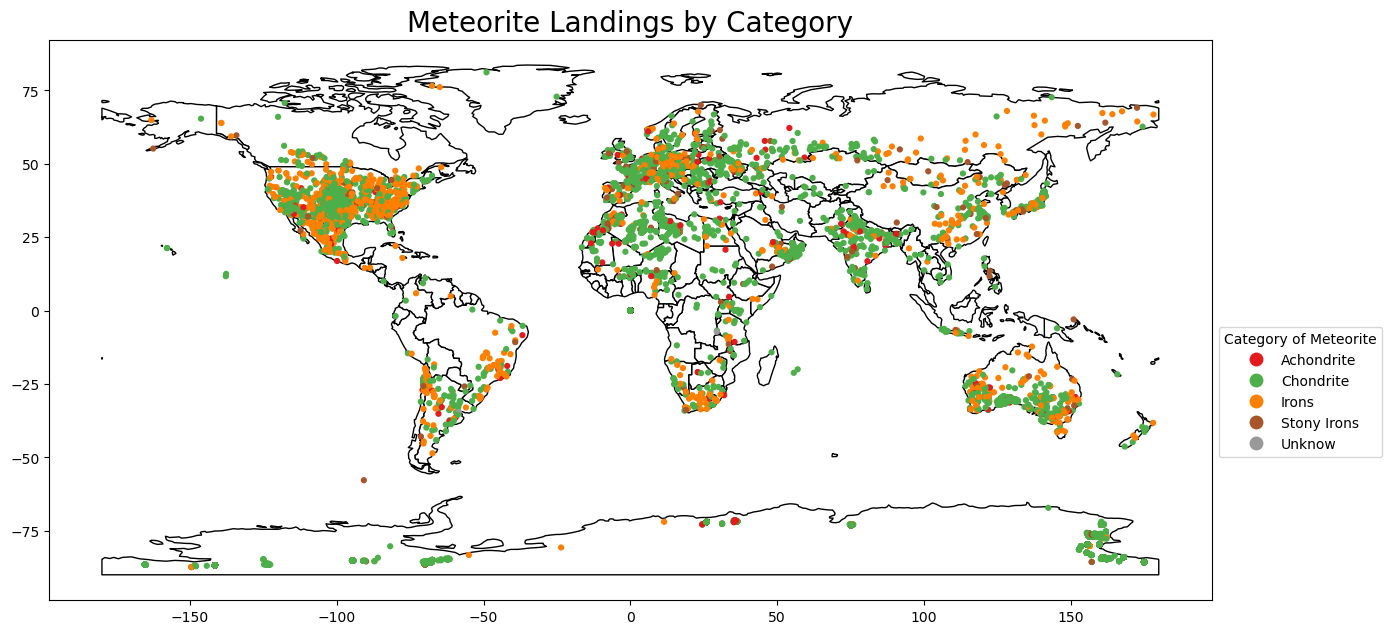

In [233]:
# create the geomtry matrix
geometry = [Point(xy) for xy in zip(df_filtered['long'], df_filtered['lat'])]

#put into gdf as its own df
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry)

#import the world plot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10)) 
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, column='category', cmap='Set1', markersize=12, legend=True, label='Category')
plt.title('Meteorite Landings by Category', fontsize=20)  # Add title

# Increase the size of the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))  # Adjust the position of the legend
leg.set_title('Category of Meteorite') 

In [229]:
new_df = df[df['category'] != 'Unknow']

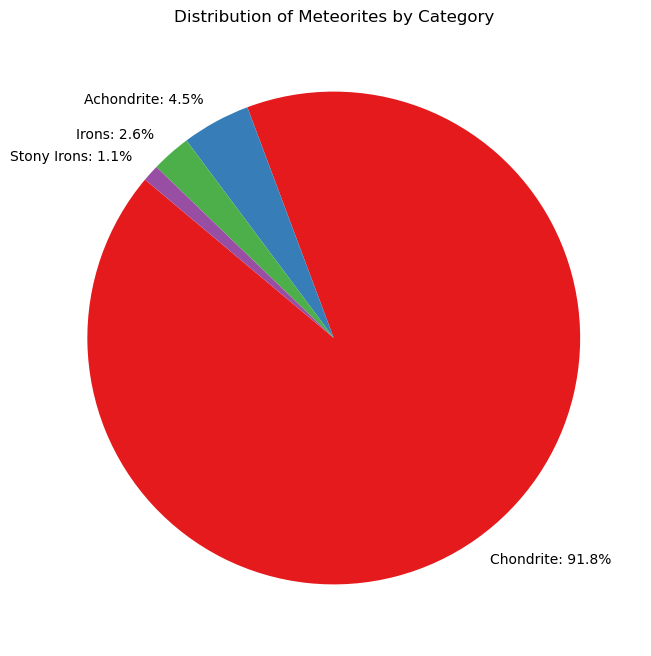

In [230]:
#create df by value count in category
category_counts = new_df['category'].value_counts()
total_count = len(new_df)
#make into percentages
percentages = [(count / total_count) * 100 for count in category_counts]

# Combine category names and percentages into labels(walkthrough)
labels = [f'{category}: {percent:.1f}%' for category, percent in zip(category_counts.index, percentages)]

#pie chart
plt.figure(figsize=(8,8))
plt.pie(percentages, labels=labels, startangle=140, colors=sns.color_palette('Set1'))

# title
plt.title('Distribution of Meteorites by Category')
plt.show()

Text(0, 0.5, 'Frequency')

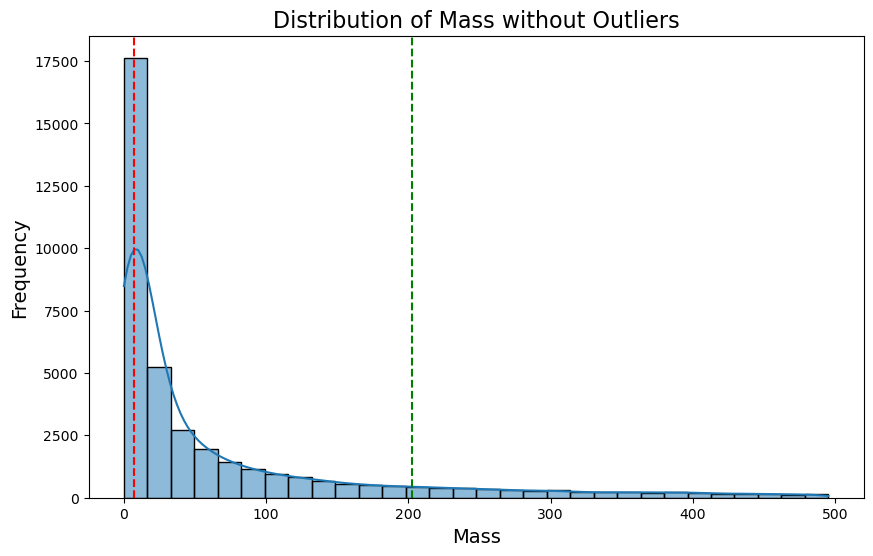

In [178]:
# Calculate quartiles
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mass_without_outliers = df[(df['mass'] >= lower_bound) & (df['mass'] <= upper_bound)]

# Set up the figure and axes
plt.figure(figsize=(10, 6))
ax = sns.histplot(mass_without_outliers['mass'], bins=30, kde=True)

ax.axvline(Q1, color='r', linestyle='--', label='Q1')  # Add Q1 line
ax.axvline(Q3, color='g', linestyle='--', label='Q3')  # Add Q3 line

# Customize appearance
ax.set_title('Distribution of Mass without Outliers', fontsize=16)  # Set title
ax.set_xlabel('Mass', fontsize=14)  # Set x-axis label
ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label

Text(0, 0.5, 'Mass')

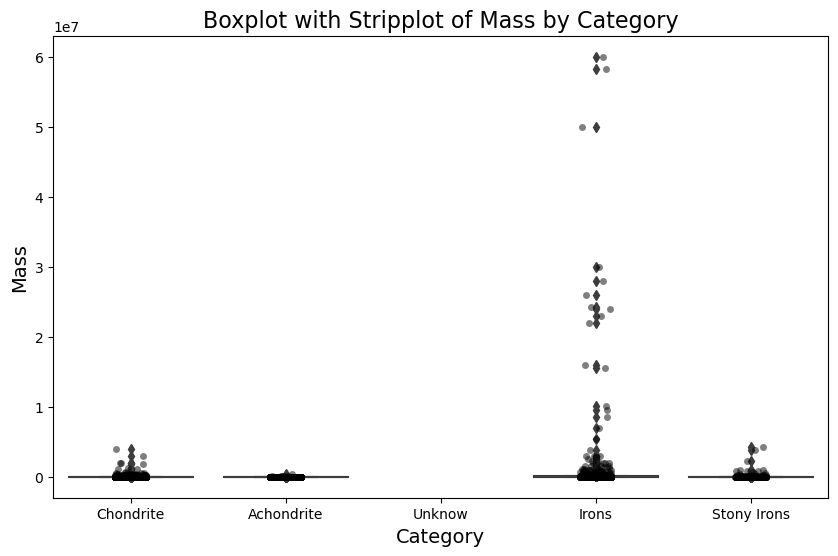

In [177]:
plt.figure(figsize=(10, 6))

# Create a boxplot with outliers
sns.boxplot(data=df, x='category', y='mass')

#overlays a strip plot(i can't get swarm to work?) to show how many are within each category
sns.stripplot(data=df, x='category', y='mass', color='black', alpha=0.5)

# Add a title and labels
plt.title('Boxplot with Stripplot of Mass by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mass', fontsize=14)

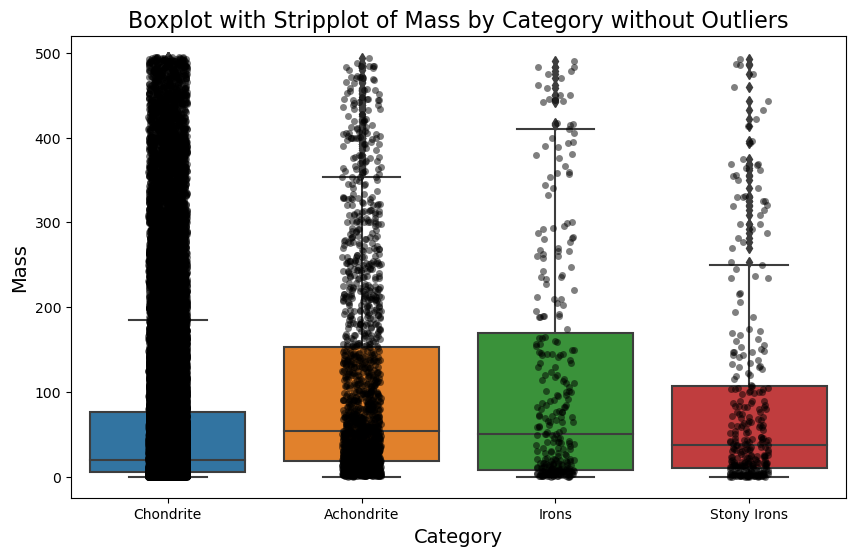

In [25]:
plt.figure(figsize=(10, 6))

# Create a boxplot without outliers
sns.boxplot(data=mass_without_outliers, x='category', y='mass')
sns.stripplot(data=mass_without_outliers, x='category', y='mass', color='black', alpha=0.5)

plt.title('Boxplot with Stripplot of Mass by Category without Outliers', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mass', fontsize=14)

# Show plot
plt.show()

In [75]:
#creates df for top 10 largest meteorites
top_10_masses_indices = df['mass'].nlargest(10).index
df_top_10_masses = df.loc[top_10_masses_indices]

In [76]:
df_top_10_masses_proportions=df_top_10_masses
df_top_10_masses_proportions['mass'] = df_top_10_masses['mass']/10000

C:\Users\M252606\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hoba'),
  Text(1, 0, 'Cape York'),
  Text(2, 0, 'Campo del Cielo'),
  Text(3, 0, 'Canyon Diablo'),
  Text(4, 0, 'Armanty'),
  Text(5, 0, 'Gibeon'),
  Text(6, 0, 'Chupaderos'),
  Text(7, 0, 'Mundrabilla'),
  Text(8, 0, 'Sikhote-Alin'),
  Text(9, 0, 'Bacubirito')])

<Figure size 1000x1000 with 0 Axes>

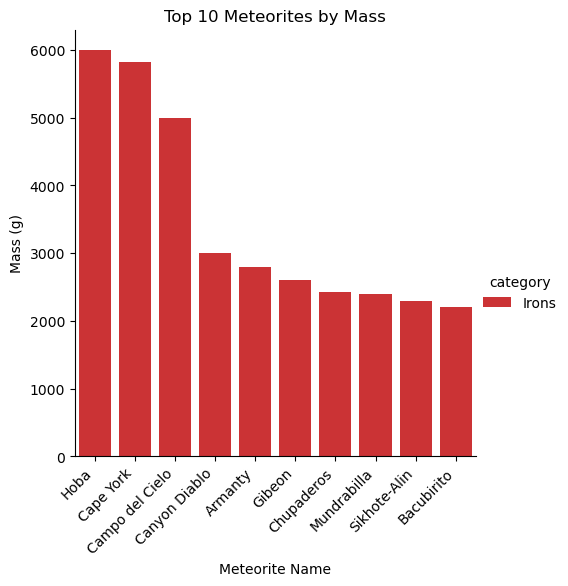

In [176]:
plt.figure(figsize=(10, 10))
sns.catplot(data=df_top_10_masses, x='name', y='mass', hue='category', kind='bar', palette='Set1')
plt.xlabel('Meteorite Name')
plt.ylabel('Mass (g)')
plt.title('Top 10 Meteorites by Mass')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability

Text(205.34722222222223, 0.5, 'Latitude')

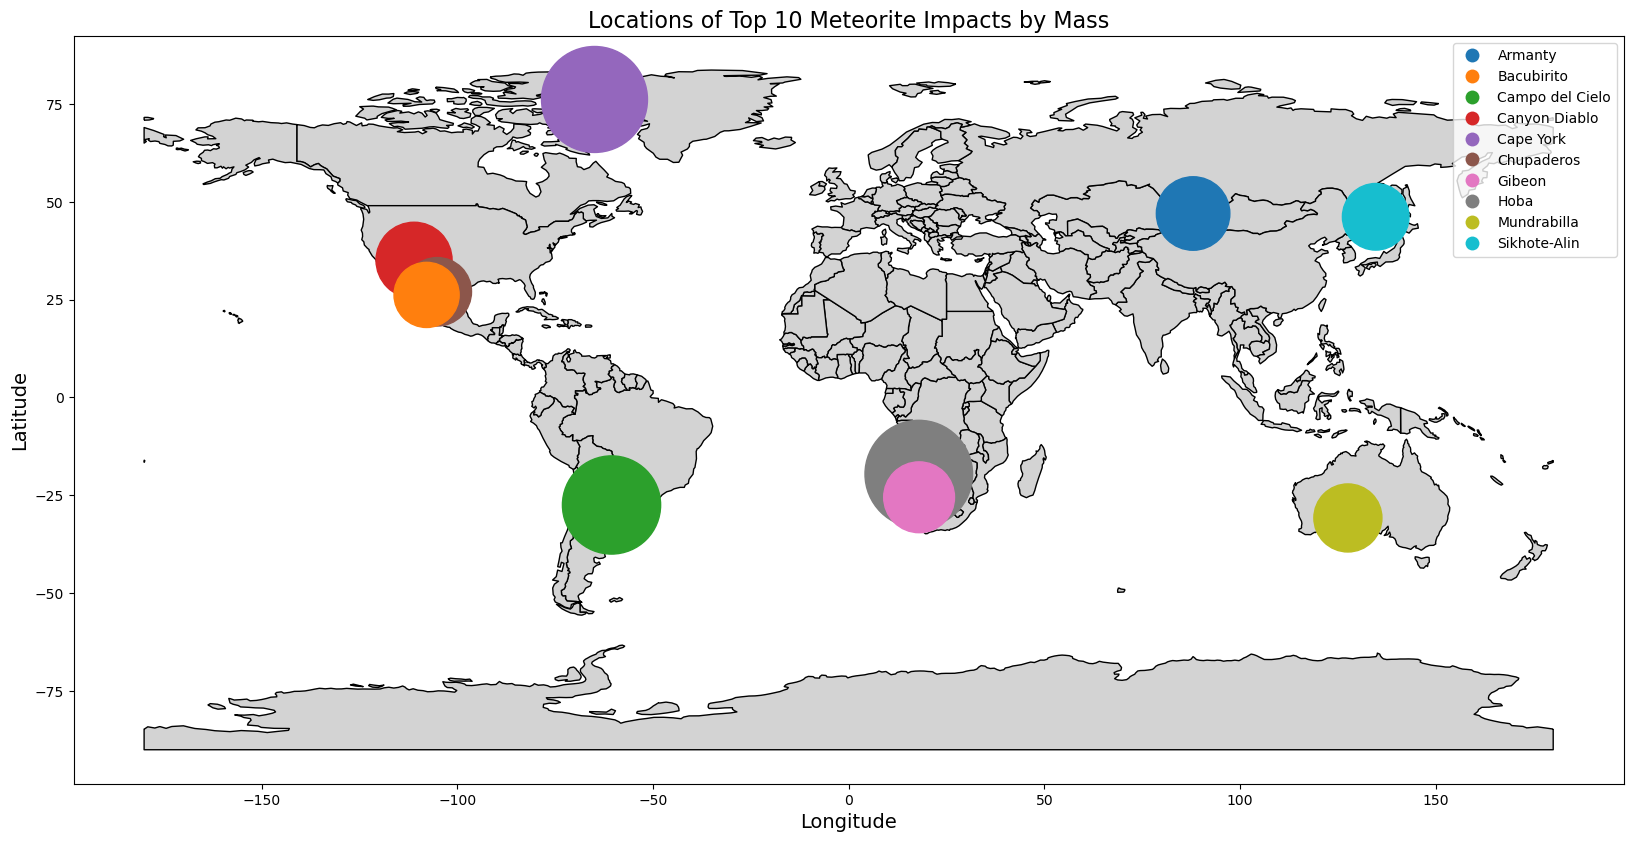

In [175]:
# Create a GeoDataFrame with geometry
geometry = [Point(xy) for xy in zip(df_top_10_masses_proportions['long'], df_top_10_masses_proportions['lat'])]
gdf_top_10_masses_proportions = gpd.GeoDataFrame(df_top_10_masses_proportions, geometry=geometry)

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the GeoDataFrame
gdf_top_10_masses_proportions.plot(ax=ax, column='name', markersize=df_top_10_masses_proportions['mass'],legend=True)

# Add titles and labels
plt.title('Locations of Top 10 Meteorite Impacts by Mass', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

In [105]:
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(205.34722222222223, 0.5, 'Latitude')

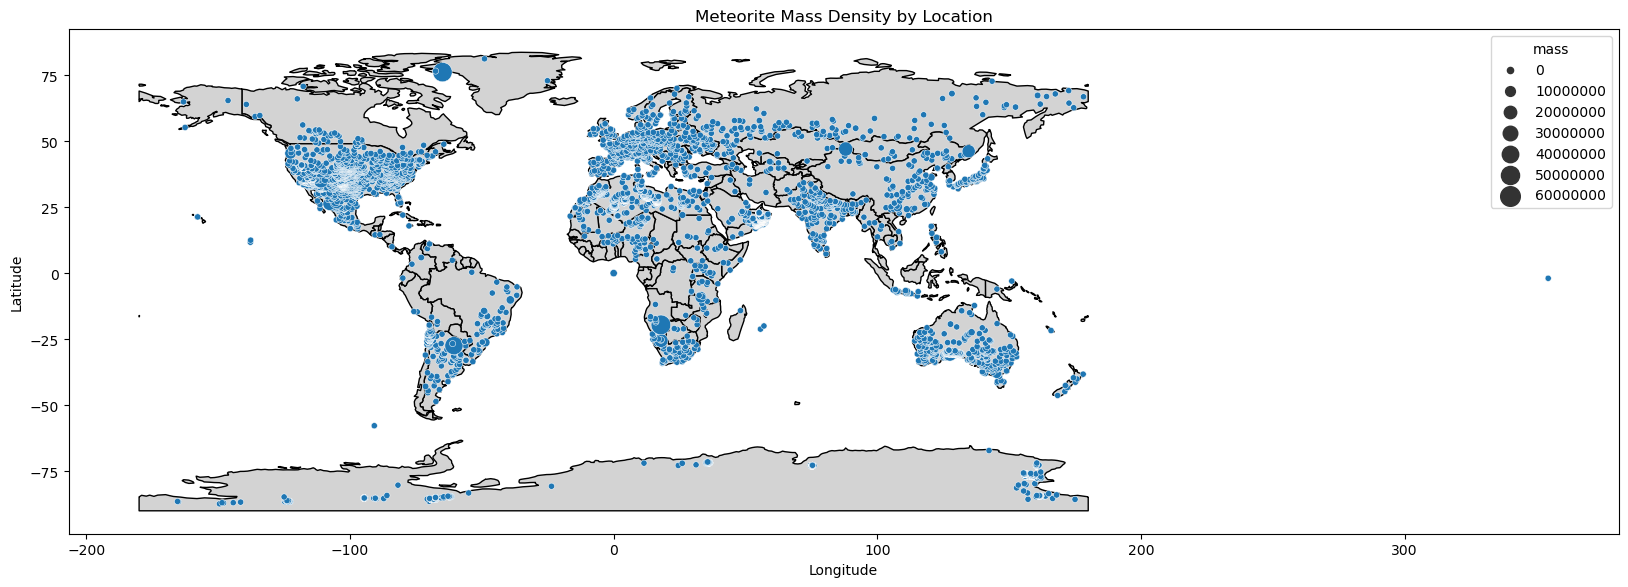

In [174]:
# Group meteorite data by geographical location and calculate total mass in each location
#I want to group by something more then just long and lat to show like country or something but I can't figur it out.
meteorite_density = df.groupby(['lat', 'long'])['mass'].sum().reset_index()

fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax, color='lightgrey', edgecolor='black')


# Plot the heatmap of meteorite mass density
sns.scatterplot(data=meteorite_density, x='long', y='lat', size='mass', sizes=(20, 200), ax=ax)

plt.title('Meteorite Mass Density by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [203]:
# Create a GeoDataFrame from your dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the latitudes and longitudes into Point geometries
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

# Create a GeoDataFrame from your dataframe
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Perform a spatial join to find which points are within polygons of the world GeoDataFrame
result = gpd.sjoin(gdf, world[['name', 'continent', 'geometry']], predicate='within', how='left')

# Select the desired columns from the result
result = result[['name_left', 'continent', 'name_right']]

# Rename the columns for clarity
result.columns = ['Name', 'Continent', 'Country']

print(result)

C:\Users\M252606\AppData\Local\Temp\ipykernel_9612\4003012737.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\M252606\AppData\Local\Temp\ipykernel_9612\4003012737.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  result = gpd.sjoin(gdf, world[['name', 'continent', 'geometry']], predicate='within', how='left')


             Name      Continent                   Country
0          Aachen         Europe                   Belgium
1          Aarhus         Europe                   Denmark
2            Abee  North America                    Canada
3        Acapulco  North America                    Mexico
4         Achiras  South America                 Argentina
...           ...            ...                       ...
45711  Zillah 002         Africa                     Libya
45712      Zinder         Africa                     Niger
45713        Zlin         Europe                   Czechia
45714   Zubkovsky         Europe                    Russia
45715  Zulu Queen  North America  United States of America

[45716 rows x 3 columns]


In [136]:
df_country = df.copy()
# Perform spatial join to find the country and continent for each point
df_country[['Country', 'Continent']] = result[['Country', 'Continent']]

In [137]:
df_country

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category,Country,Continent
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",3,Chondrite,Belgium,Europe
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",4,Chondrite,Denmark,Europe
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",112,Chondrite,Canada,North America
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",56,Achondrite,Mexico,North America
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",1,Chondrite,Argentina,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)",21,Achondrite,Libya,Africa
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)",216,Stony Irons,Niger,Africa
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)",5,Chondrite,Czechia,Europe
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)",1,Chondrite,Russia,Europe


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Antarctica'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'Europe'),
  Text(6, 0, 'South America')])

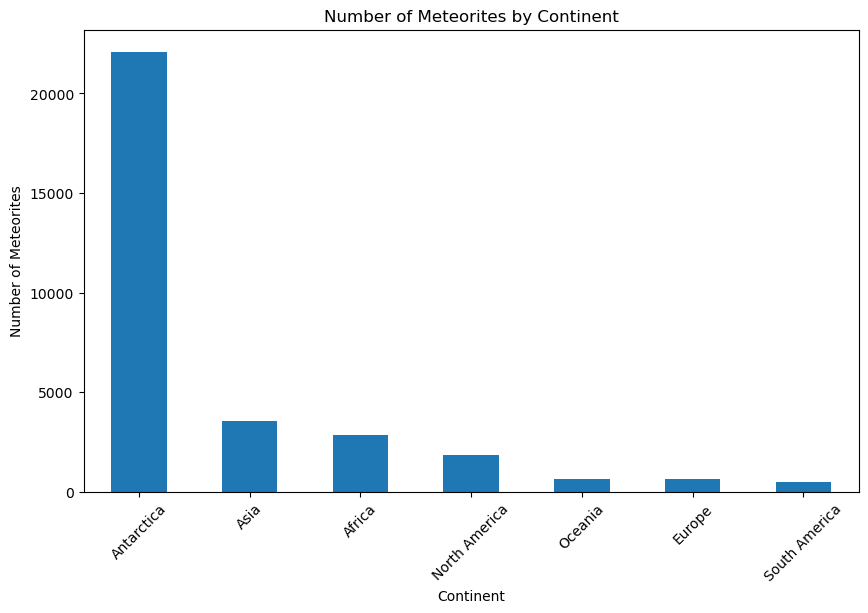

In [173]:
continent_counts = df_country['Continent'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar')
plt.title('Number of Meteorites by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Meteorites')
plt.xticks(rotation=45)

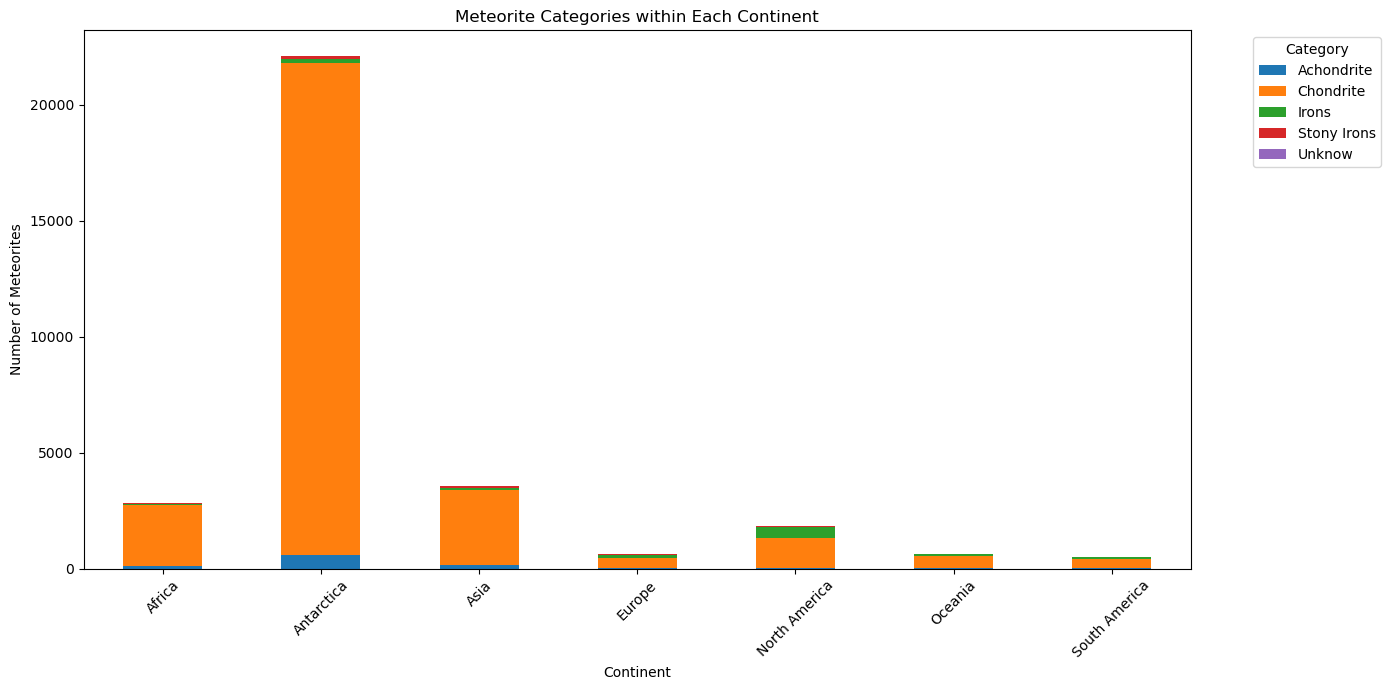

In [172]:
category_counts_continent = df_country.groupby('Continent')['category'].value_counts().unstack(fill_value=0)

# Plot a stacked bar chart
category_counts_continent.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Meteorite Categories within Each Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Meteorites')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot outside of the legend
plt.tight_layout()

In [222]:
mean_mass_df = df_country.groupby('Continent').agg({'mass': 'mean'}).reset_index()
sum_mass_df = df_country.groupby('Continent').agg({'mass': 'sum'}).reset_index()

C:\Users\M252606\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\M252606\AppData\Local\Temp\ipykernel_9612\3368990533.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

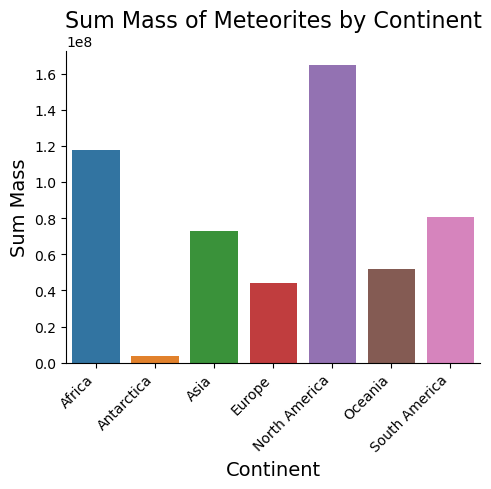

In [223]:
plt.figure(figsize=(10, 10))
sns.catplot(data=sum_mass_df, x='Continent', y='mass', kind='bar')

plt.xlabel('Continent', fontsize=14)
plt.ylabel('Sum Mass', fontsize=14)
plt.title('Sum Mass of Meteorites by Continent', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Iron, IVB'),
  Text(1, 0, 'Iron, IIIAB'),
  Text(2, 0, 'Iron, IAB-MG'),
  Text(3, 0, 'Iron, IIIE'),
  Text(4, 0, 'Iron, IVA'),
  Text(5, 0, 'Iron, IAB-ung'),
  Text(6, 0, 'Iron, IIAB'),
  Text(7, 0, 'Iron, ungrouped')])

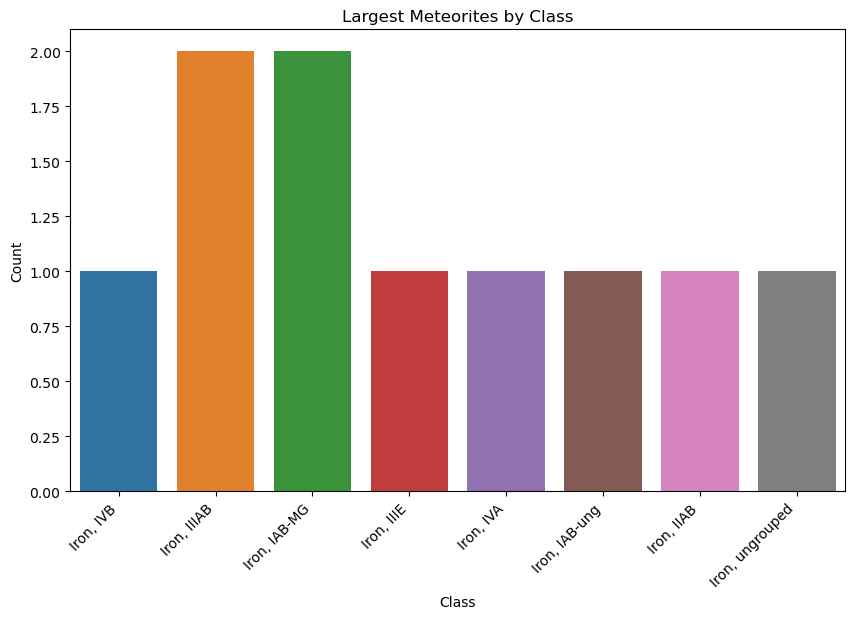

In [171]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_masses, x='class')

# Set title and labels
plt.title('Largest Meteorites by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

In [202]:
unique_classes_per_category = df.groupby('category')['class'].nunique().reset_index()
unique_classes_per_category


,category,class
0,Achondrite,44
1,Chondrite,337
2,Irons,42
3,Stony Irons,31
4,Unknow,1


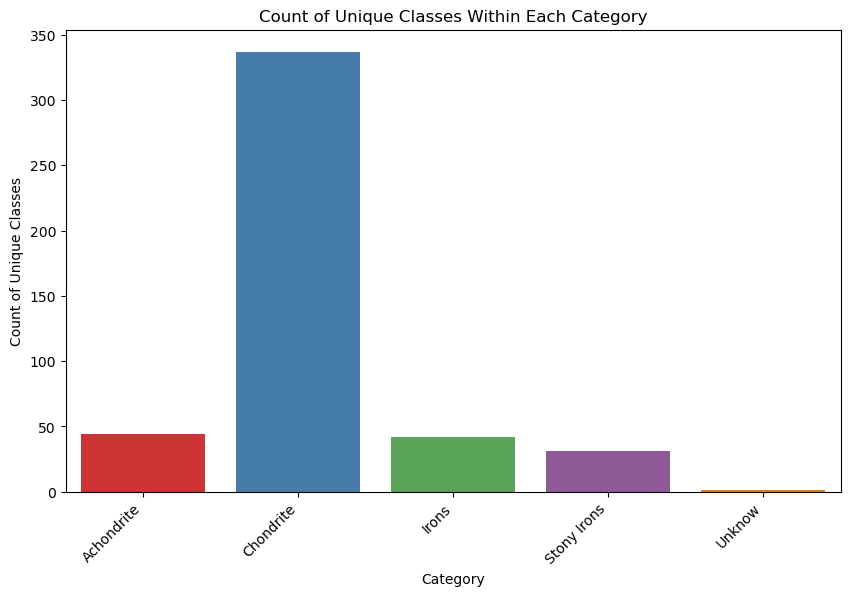

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_classes_per_category, x='category', y='class', palette='Set1')

# Set title and labels
plt.title('Count of Unique Classes Within Each Category')
plt.xlabel('Category')
plt.ylabel('Count of Unique Classes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

In [126]:
chondrite_data = df[df['category'] == 'Chondrite']
achondrite_data = df[df['category'] == 'Achondrite']
irons_data = df[df['category'] == 'Irons']
stony_irons_data = df[df['category'] == 'Stony Irons']
unknow_data = df[df['category'] == 'Unknow']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Acapulcoite'),
  Text(1, 0, 'Diogenite-pm'),
  Text(2, 0, 'Eucrite-mmict'),
  Text(3, 0, 'Ureilite-an'),
  Text(4, 0, 'Angrite'),
  Text(5, 0, 'Howardite'),
  Text(6, 0, 'Eucrite-pmict'),
  Text(7, 0, 'Diogenite'),
  Text(8, 0, 'Eucrite'),
  Text(9, 0, 'Martian (chassignite)'),
  Text(10, 0, 'Ureilite'),
  Text(11, 0, 'Lodranite'),
  Text(12, 0, 'Eucrite-cm'),
  Text(13, 0, 'Martian (nakhlite)'),
  Text(14, 0, 'Winonaite'),
  Text(15, 0, 'Eucrite-br'),
  Text(16, 0, 'Martian (shergottite)'),
  Text(17, 0, 'Achondrite-ung'),
  Text(18, 0, 'Martian (OPX)'),
  Text(19, 0, 'Brachinite'),
  Text(20, 0, 'Eucrite-Mg rich'),
  Text(21, 0, 'Eucrite-unbr'),
  Text(22, 0, 'Lunar (anorth)'),
  Text(23, 0, 'Lunar'),
  Text(24, 0, 'Lunar (gabbro)'),
  Text(25, 0, 'Ureilite-pmict'),
  Tex

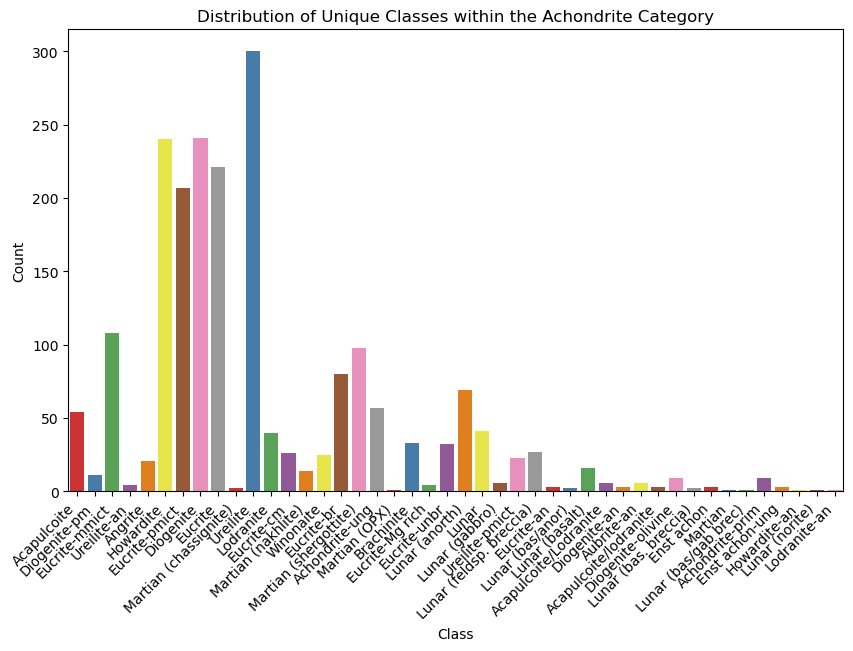

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(data=achondrite_data, x='class', palette='Set1')

# Set title and labels
plt.title('Distribution of Unique Classes within the Achondrite Category')
plt.xlabel('Class')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

(-1.099999445570318, 1.099999867208848, -1.099999869027629, 1.099999993763203)

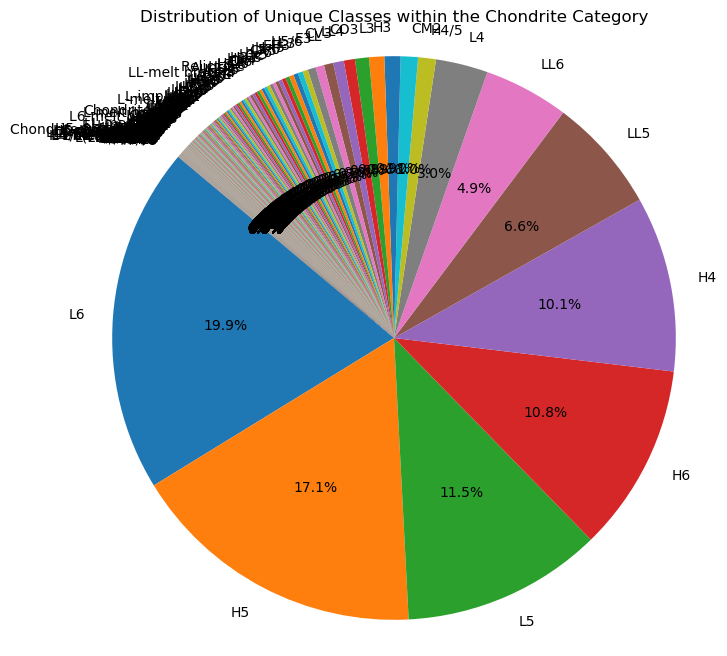

In [169]:
class_counts = chondrite_data['class'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Unique Classes within the Chondrite Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

(-1.0999999716720503,
 1.0999999975775054,
 -1.099999974877716,
 1.0999999988037008)

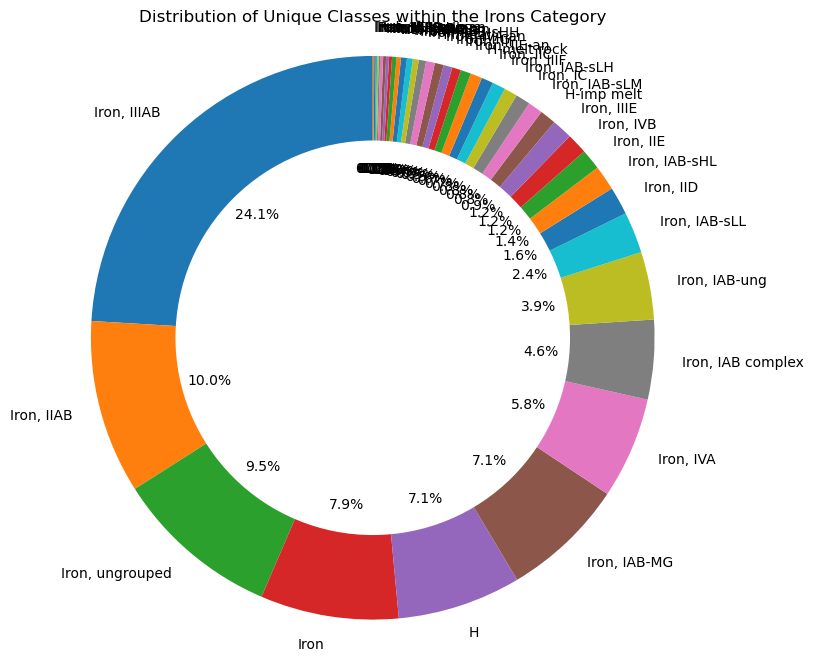

In [168]:
class_counts = irons_data['class'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Unique Classes within the Irons Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

In [143]:
# Calculate the count of categories within each continent
category_counts_continent = df_country.groupby('Continent')['category'].value_counts().unstack(fill_value=0)

# Calculate the total number of meteorites in each continent
total_per_continent = df_country['Continent'].value_counts()

# Calculate the percentage of each category within each continent
category_percentages_continent = category_counts_continent.div(total_per_continent, axis=0) * 100


Text(120.72222222222221, 0.5, 'Continent')

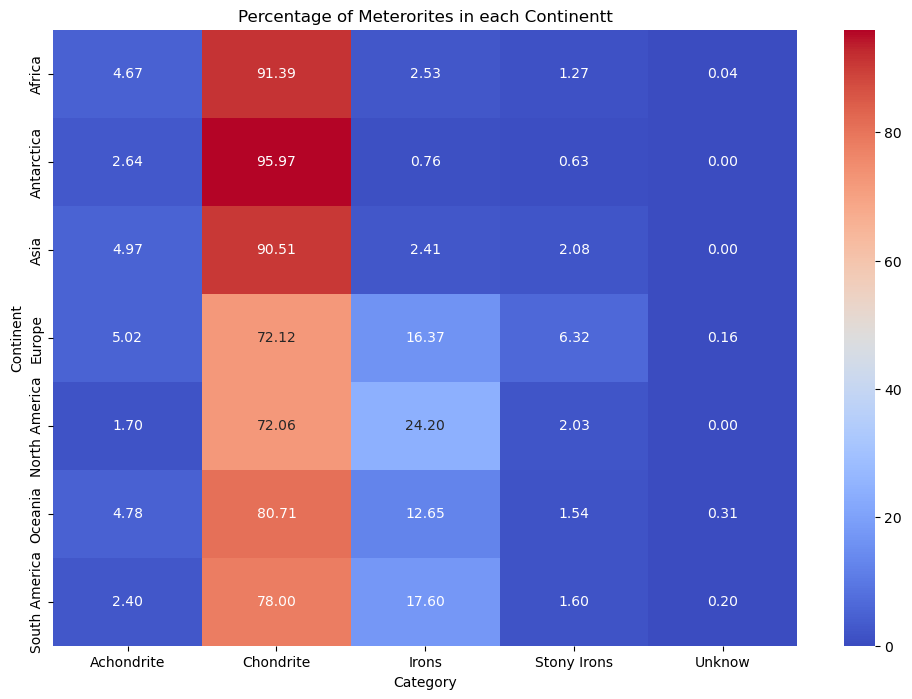

In [167]:
plt.figure(figsize=(12, 8))
sns.heatmap(category_percentages_continent, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Percentage of Meterorites in each Continentt')
plt.xlabel('Category')
plt.ylabel('Continent')

In [156]:
df_country

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category,Country,Continent
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",3,Chondrite,Belgium,Europe
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",4,Chondrite,Denmark,Europe
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",112,Chondrite,Canada,North America
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",56,Achondrite,Mexico,North America
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",1,Chondrite,Argentina,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)",21,Achondrite,Libya,Africa
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)",216,Stony Irons,Niger,Africa
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)",5,Chondrite,Czechia,Europe
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)",1,Chondrite,Russia,Europe


In [185]:
new_df = df_country.groupby(['Continent', 'Country']).agg({'Country': 'count', 'mass': 'sum'})
new_df.columns = ['count of meteorite', 'sum of mass of meteorites']

In [198]:
new_df.head()

,Country,count of meteorite,sum of mass of meteorites,lat,long
0,Algeria,626,2216225.01,27.247584,2.617662
1,Angola,4,32883.00,-15.750000,14.908333
2,Botswana,4,14650.00,-21.088625,24.135475
3,Burkina Faso,11,66594.00,12.260712,-1.160954
4,Cameroon,3,1032.10,8.005557,12.949997


Text(0.5, 1.0, 'Count of Meteorites by Country')

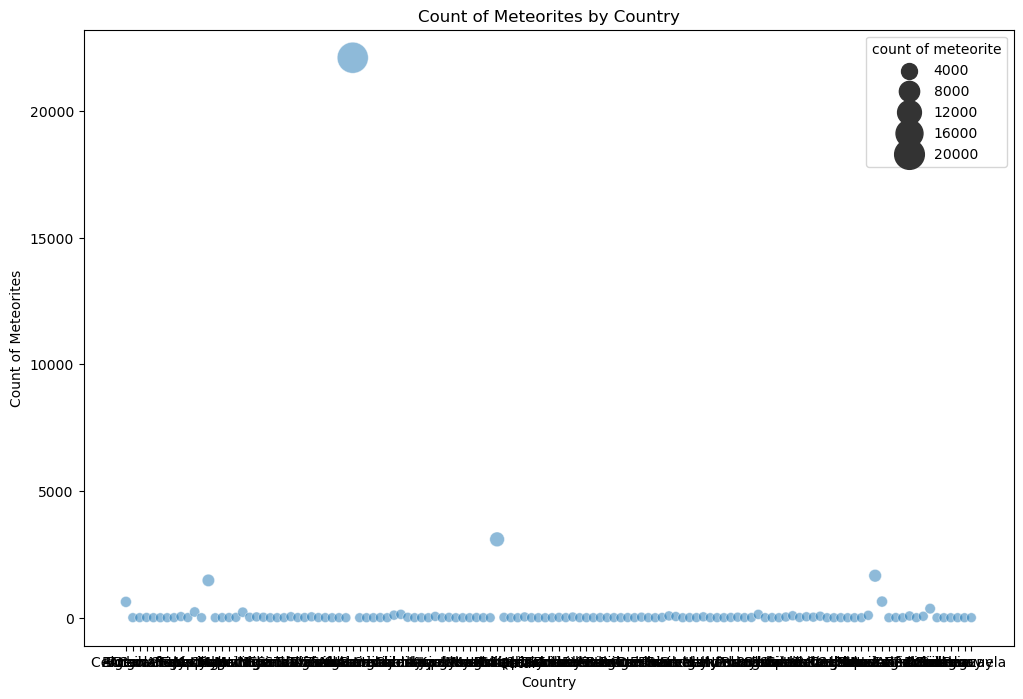

In [187]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new_df, x='Country', y='count of meteorite', size='count of meteorite', sizes=(50, 500), alpha=0.5)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count of Meteorites')
plt.title('Count of Meteorites by Country')

In [188]:
# Aggregate latitude and longitude by country(is mean a good way to do this?)
country_lat_lon = df_country.groupby('Country').agg({'lat': 'mean', 'long': 'mean'}).reset_index()

# Merge latitude and longitude into new_df
new_df = new_df.merge(country_lat_lon, on='Country', how='left')

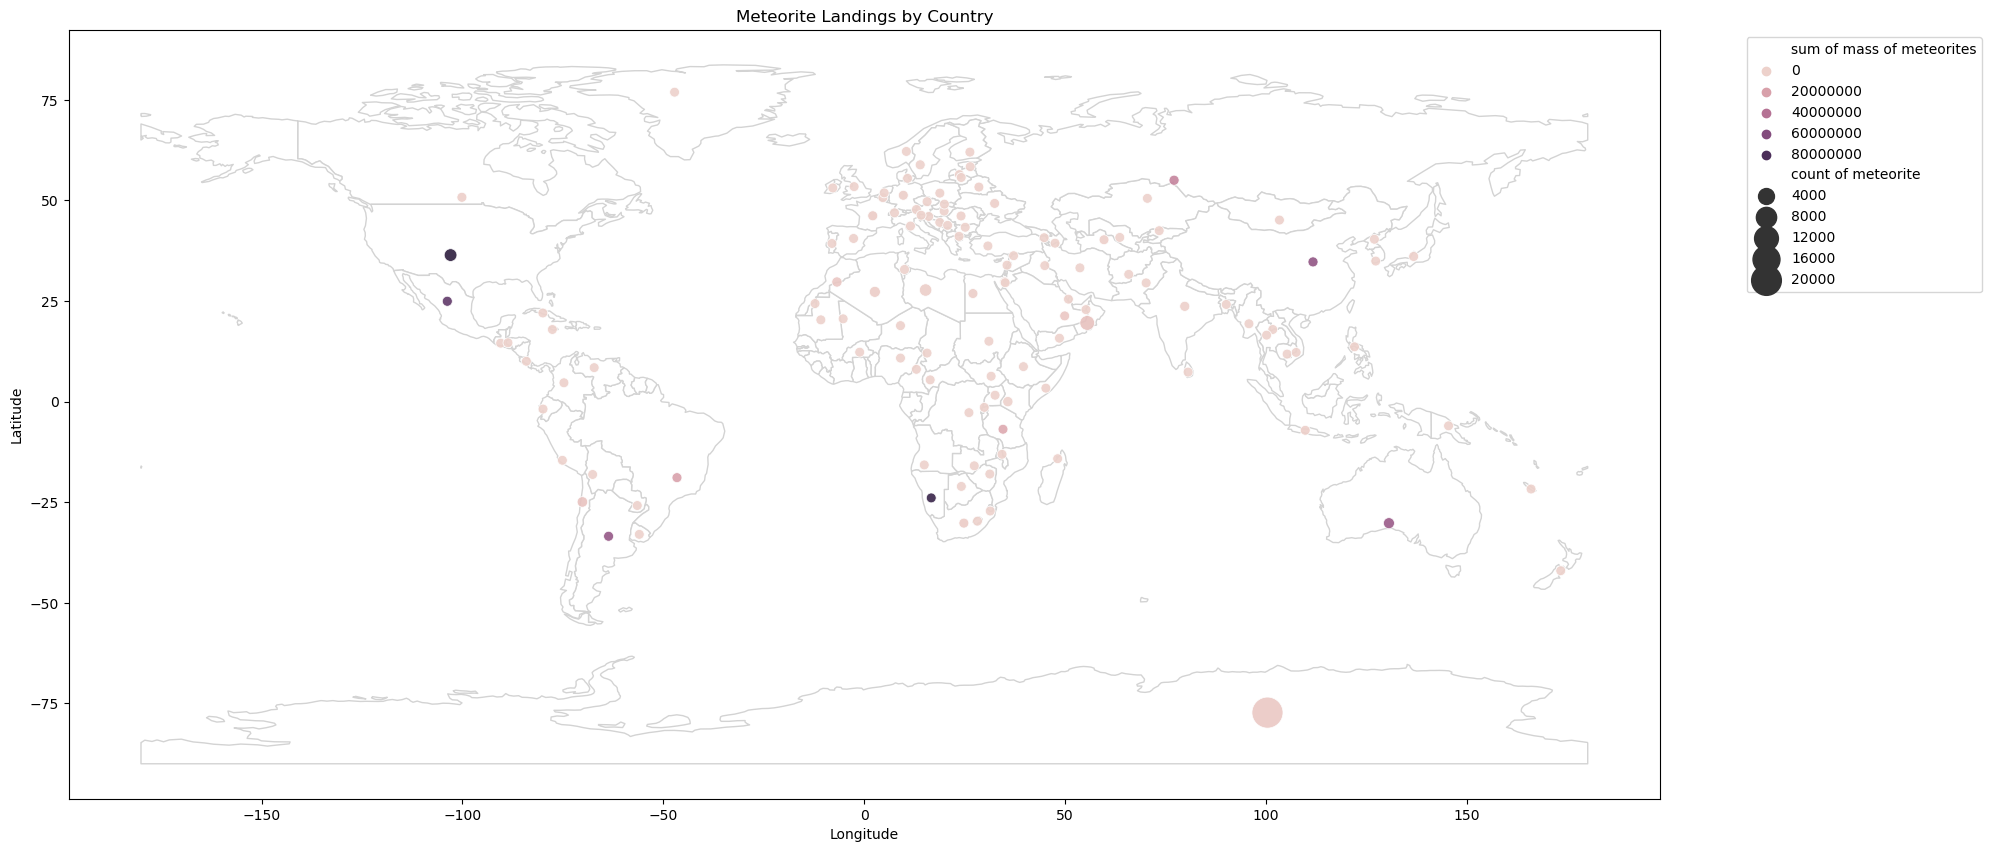

In [228]:
fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax, color='white', edgecolor='lightgrey')

# Plot the scatterplot on the same subplot
sns.scatterplot(data=new_df, x='long', y='lat', hue='sum of mass of meteorites', size='count of meteorite', sizes=(50, 500), alpha=0.9, ax=ax)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Landings by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot outside of the legend
plt.tight_layout()